In [1]:
from config_path import add_to_sys_path
add_to_sys_path()  # Call the function to add path

import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex,display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette('terrain')
from molecular_structure import MoleculeLevels
np.set_printoptions(precision=5, suppress=True)
import time
from matplotlib.colors import TwoSlopeNorm

In [2]:
import json
import ujson as uj

def get_json_data(file_path,numpy=False,ujson=True):
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path, 'r') as f:
        if ujson:
            data = uj.load(f)
        else:
            data = json.load(f)
    if numpy:
        data = np.array(data)
    return data

def save_json_data(data,file_path,ujson=True):
    if type(data) is np.ndarray:
        data_save = data.tolist()
    else:
        data_save=data
    if '.json' not in file_path:
        file_path+='.json'
    with open(file_path,'w') as f:
        if ujson:
            uj.dump(data_save,f)
        else:
            json.dump(data_save,f)
    print('Data saved to', file_path)

In [18]:
Ez = np.linspace(0,30000,5000)
Bz = np.linspace(0,10,5000)

In [19]:
X000 = MoleculeLevels.initialize_state('YbOH','174','X000',[0,1,2,3],M_values ='pos',I=[0,1/2],S=1/2,round=8)

No P values provided, using P=1/2 as default


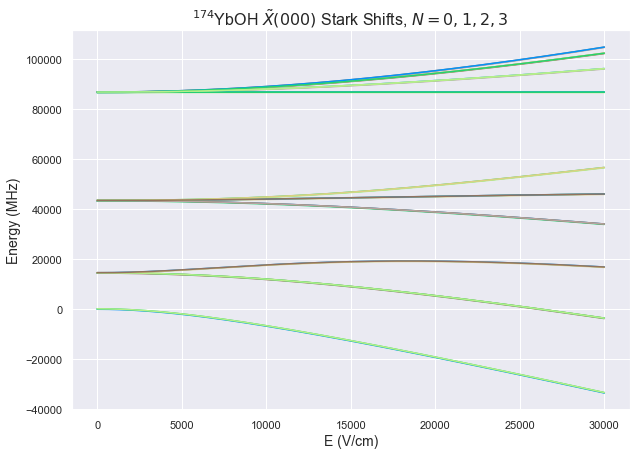

In [20]:
X000.StarkMap(Ez,Bz_val=1e-6,plot=True)

In [21]:
X000.g_eff_Map('E');
X000.PTV_Map('EDM','E',plot=False)

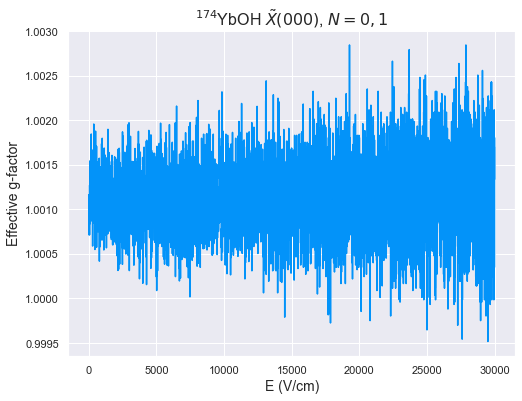

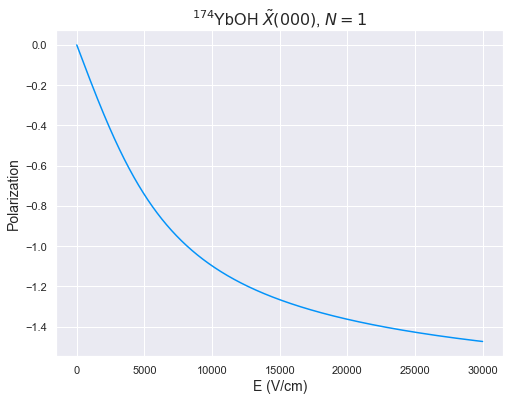

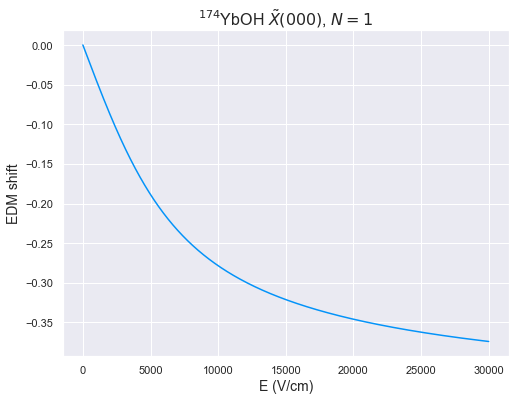

In [30]:
j = X000.select_q({'N':[0],'M':[1]})
plt.figure(figsize=(8,6))
for i in j:#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X000.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Effective g-factor',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(000)$, $N=0,1$',fontsize=16);
plt.figure(figsize=(8,6))
for i in j:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,np.gradient(X000.evals_E.T[i])/(abs(Ez[0]-Ez[1])))
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Polarization',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(000)$, $N=1$',fontsize=16);
plt.figure(figsize=(8,6))
for i in j:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X000.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(000)$, $N=1$',fontsize=16);

In [15]:
state_dict = {}
eval_dict = {}
PTV_dict = {}

Bz = np.linspace(0,20,2000)
Ez = np.linspace(0,500,2000)

for M in range(-2,3,1):
    M_state = MoleculeLevels.initialize_state('CaOH','40','X010',[1],M_values = 'custom',I=[0,1/2],S=1/2,round=8,M_range=[M])
    state_dict[M] = M_state
    print(M)
    t0 = time.perf_counter()
    Bslices = M_state.EB_grid(Ez,Bz,PTV=True,E_or_B_first='B',output=True,EDM_or_MQM='EDM')
    t1 = time.perf_counter()
    elapsed = t1 - t0
    print(elapsed, 'sec\n')
    eval_dict[M] = Bslices[0]
    PTV_dict[M] = Bslices[1]

-2
85.10949849999997 sec

-1
108.48434049999969 sec

0
118.28387040000007 sec

1
111.62935489999973 sec

2
85.75819169999977 sec



In [18]:
for M in eval_dict.keys():
    save_json_data(eval_dict[M].tolist(),'X010_CaOH_N1_M{}_EB_grid_evals_20220310'.format(M))
    save_json_data(PTV_dict[M].tolist(),'X010_CaOH_N1_M{}_EB_grid_PTV_20220310'.format(M))

Data saved to X010_CaOH_N1_M-2_EB_grid_evals_20220310.json
Data saved to X010_CaOH_N1_M-2_EB_grid_PTV_20220310.json
Data saved to X010_CaOH_N1_M-1_EB_grid_evals_20220310.json
Data saved to X010_CaOH_N1_M-1_EB_grid_PTV_20220310.json
Data saved to X010_CaOH_N1_M0_EB_grid_evals_20220310.json
Data saved to X010_CaOH_N1_M0_EB_grid_PTV_20220310.json
Data saved to X010_CaOH_N1_M1_EB_grid_evals_20220310.json
Data saved to X010_CaOH_N1_M1_EB_grid_PTV_20220310.json
Data saved to X010_CaOH_N1_M2_EB_grid_evals_20220310.json
Data saved to X010_CaOH_N1_M2_EB_grid_PTV_20220310.json


In [19]:
mesh = np.array(np.meshgrid(Ez,Bz,indexing='ij'))
save_json_data(mesh.tolist(),'X010_CaOH_N1_EzBz_grid_20220310')

Data saved to X010_CaOH_N1_EzBz_grid_20220310.json


In [ ]:
eval_dict[0]

In [32]:
eval_dict[0][0].shape

(2000, 2000)

In [33]:
mesh[:,0,0]

array([0., 0.])

In [30]:
mesh.shape

(2, 2000, 2000)

In [24]:
eval_dict[0][0]

array([[9957.19497, 9957.19495, 9957.1949 , ..., 9936.70163, 9936.68857,
        9936.67551],
       [9957.19487, 9957.19485, 9957.19479, ..., 9936.70144, 9936.68838,
        9936.67533],
       [9957.19456, 9957.19454, 9957.19448, ..., 9936.70089, 9936.68783,
        9936.67477],
       ...,
       [9802.38378, 9802.38052, 9802.37233, ..., 9774.59982, 9774.58587,
        9774.57192],
       [9802.29259, 9802.28933, 9802.28114, ..., 9774.50845, 9774.4945 ,
        9774.48056],
       [9802.2014 , 9802.19814, 9802.18995, ..., 9774.41708, 9774.40314,
        9774.38919]])

-2


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/4137279930.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


-1
0
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/4137279930.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


2


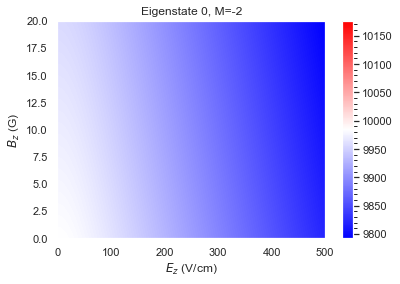

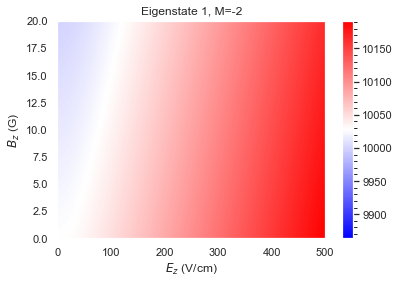

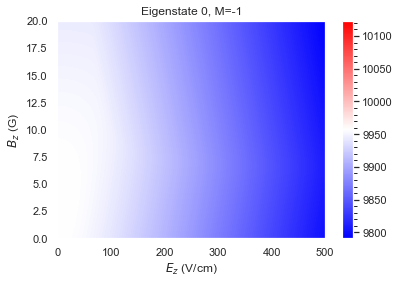

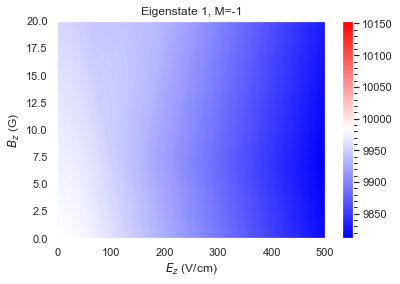

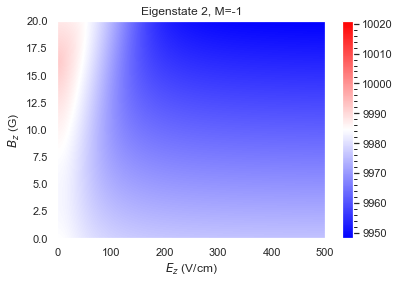

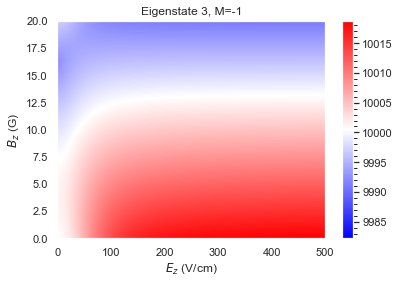

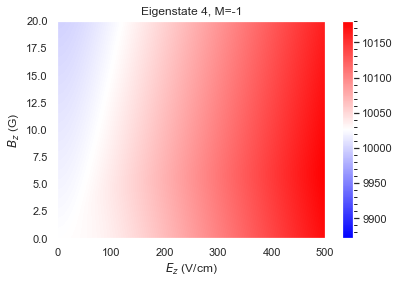

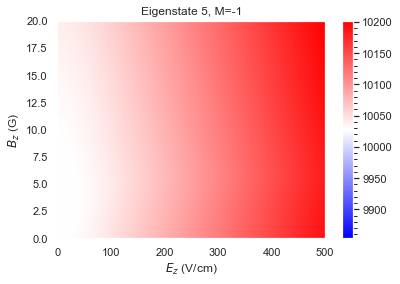

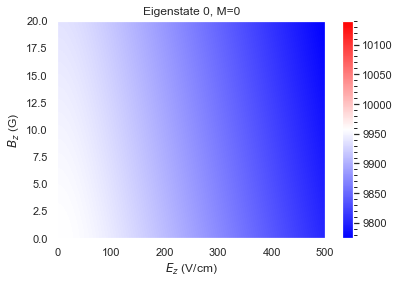

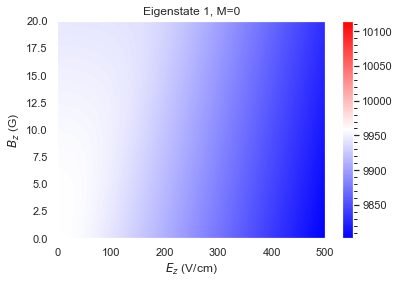

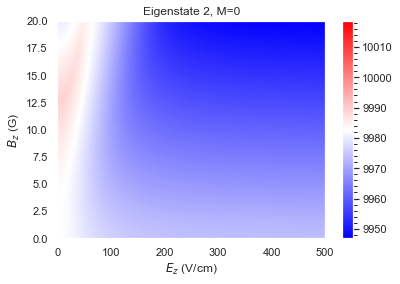

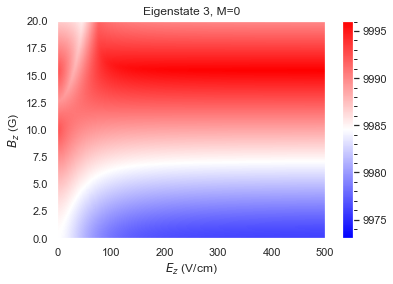

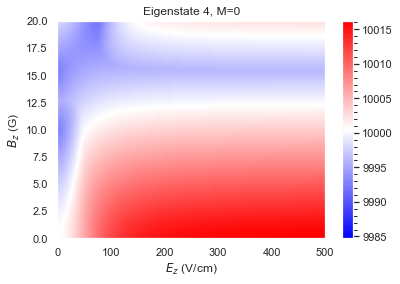

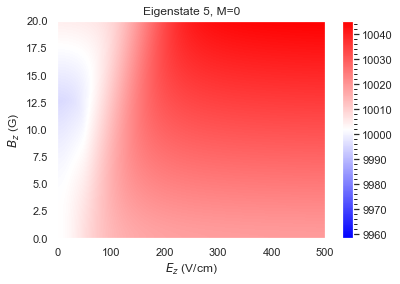

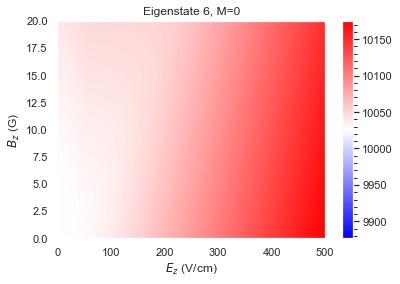

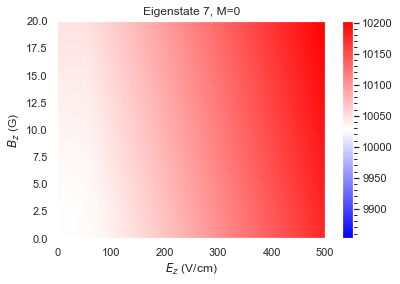

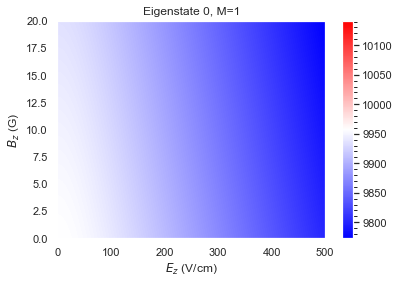

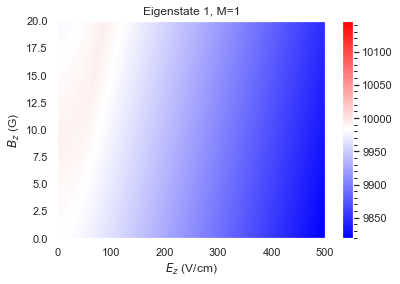

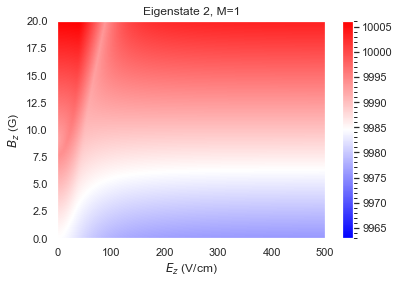

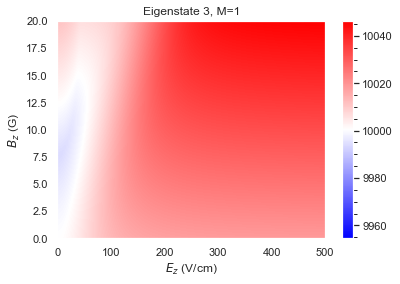

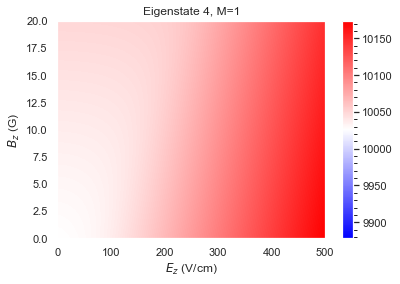

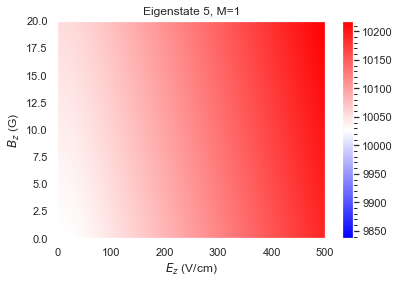

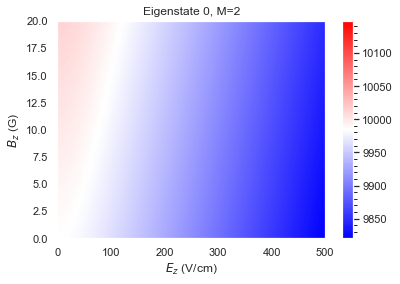

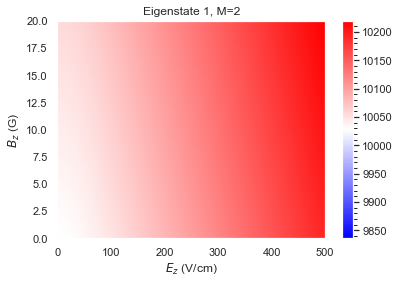

In [41]:
for M in eval_dict.keys():
    print(M)
    evals_EB = eval_dict[M]
    for i in range(len(evals_EB)):
        plt.figure()
        E0 = evals_EB[i][0,0]
        max_delta = max(abs(evals_EB[i].max()-E0),abs(evals_EB[i].min()-E0))
        plt.grid(False)
        plt.pcolormesh(*mesh,evals_EB[i],shading='auto',cmap='bwr',norm=TwoSlopeNorm(vcenter=E0,vmin=E0-max_delta,vmax=E0+max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [193]:
geff.min()/1.402

-0.9994536823122795

In [202]:
muBgS=1.399624494*2.0023/2

-1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3739572149.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


0
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3739572149.py:17: UserWarning: No contour levels were found within the data range.
  conmap = plt.contour(*mesh,geff/muBgS,cmap='seismic',levels=[-0.1,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))


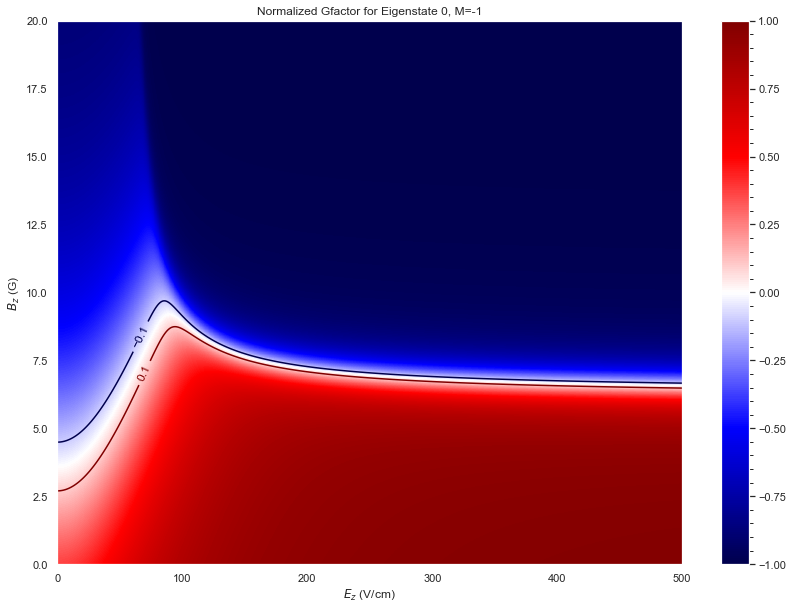

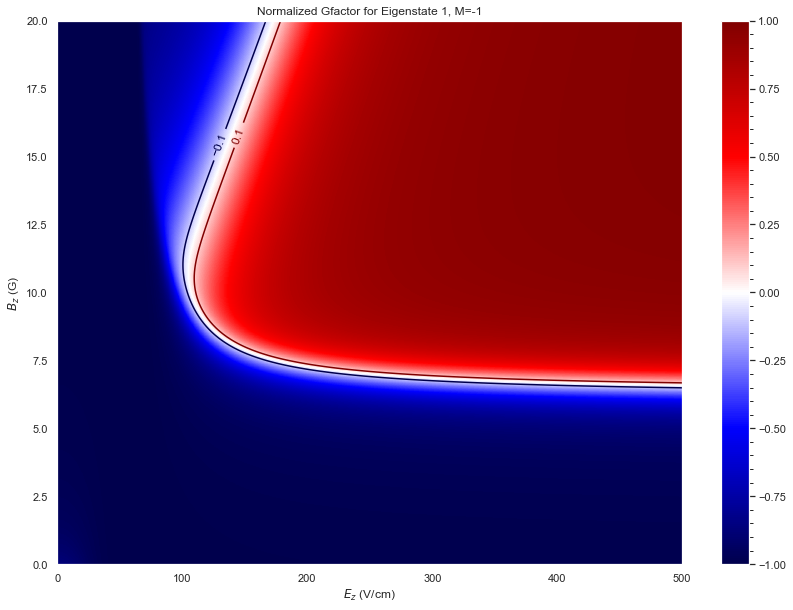

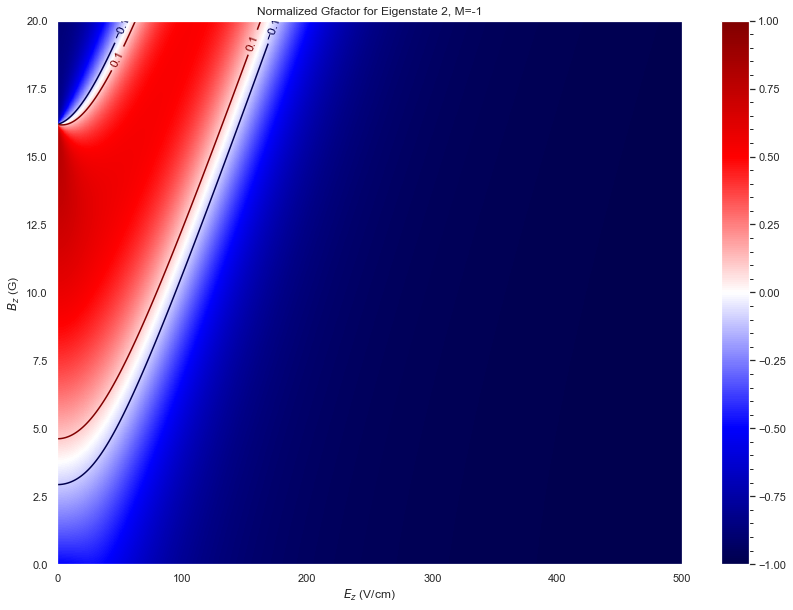

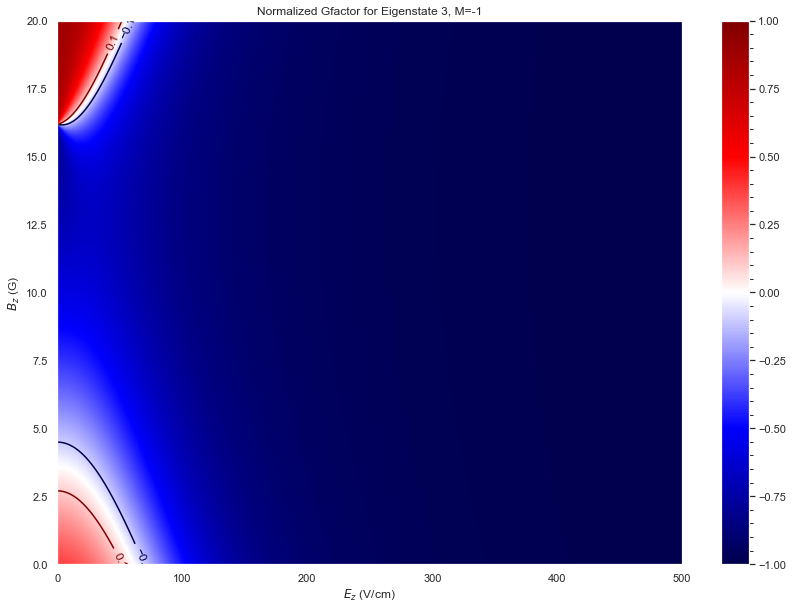

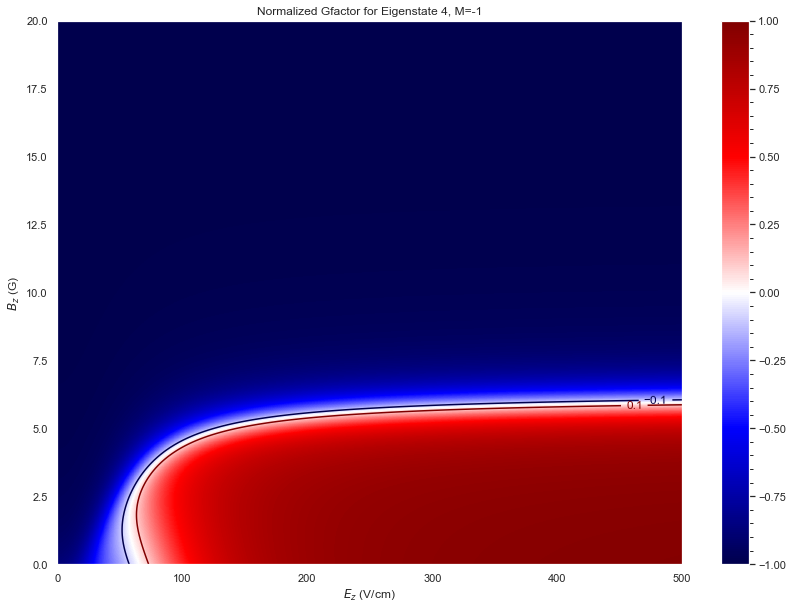

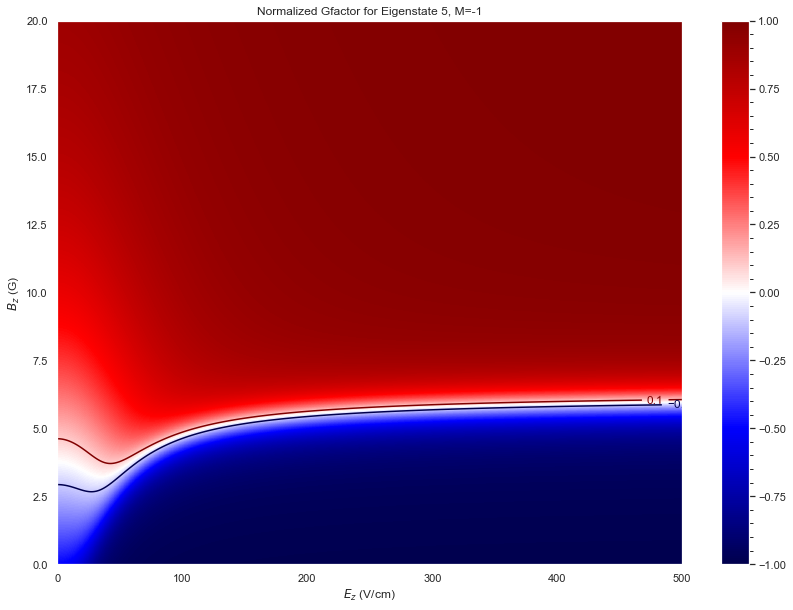

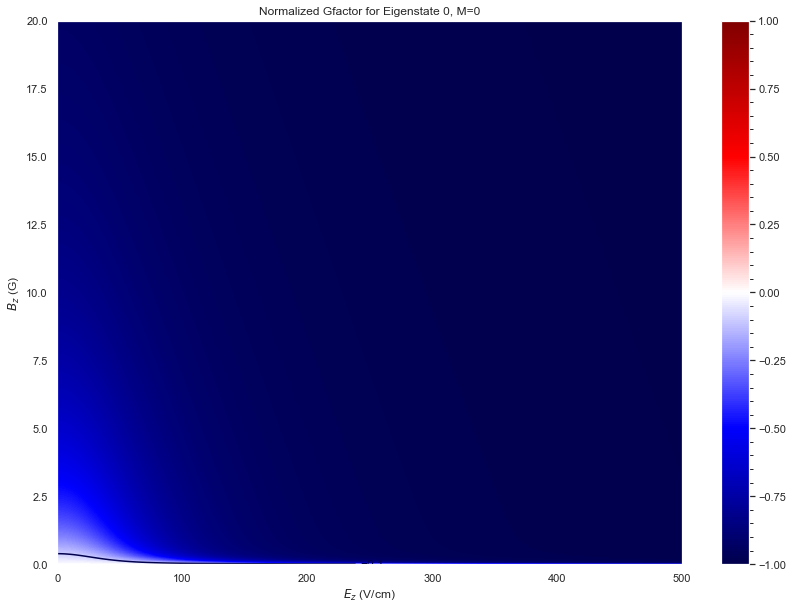

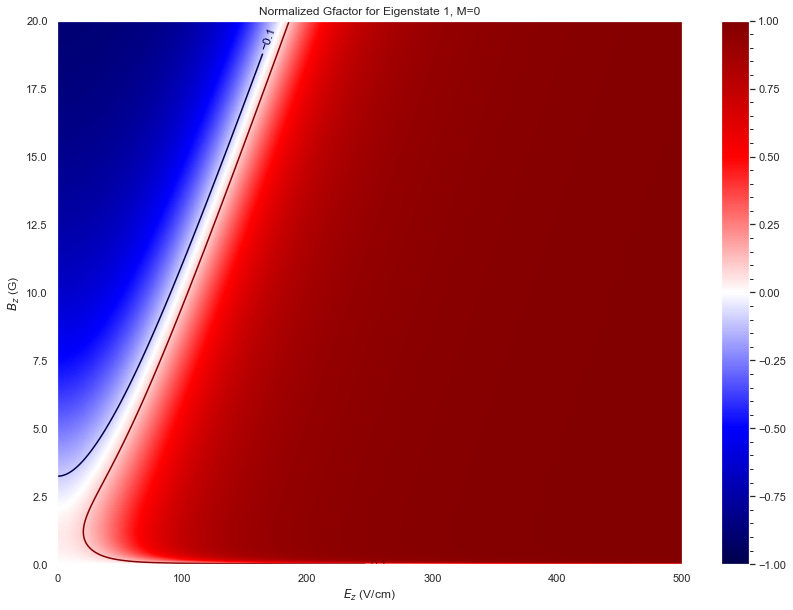

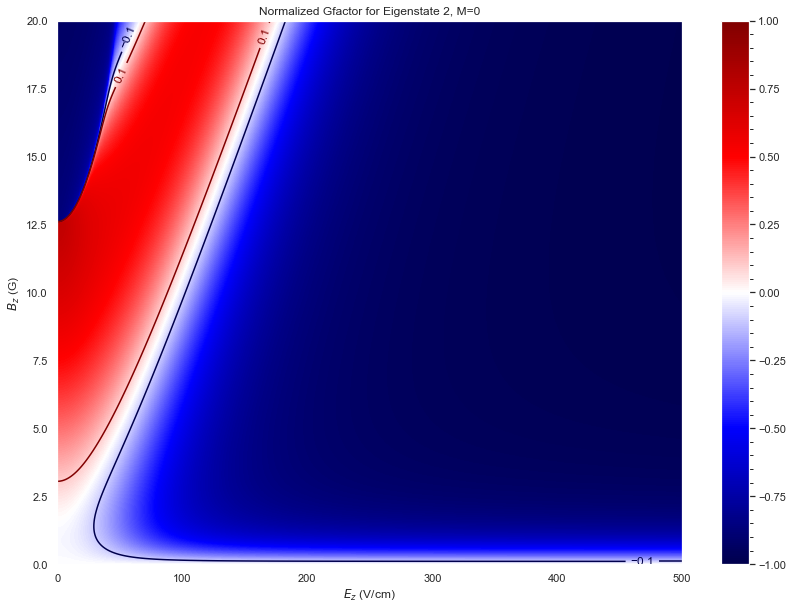

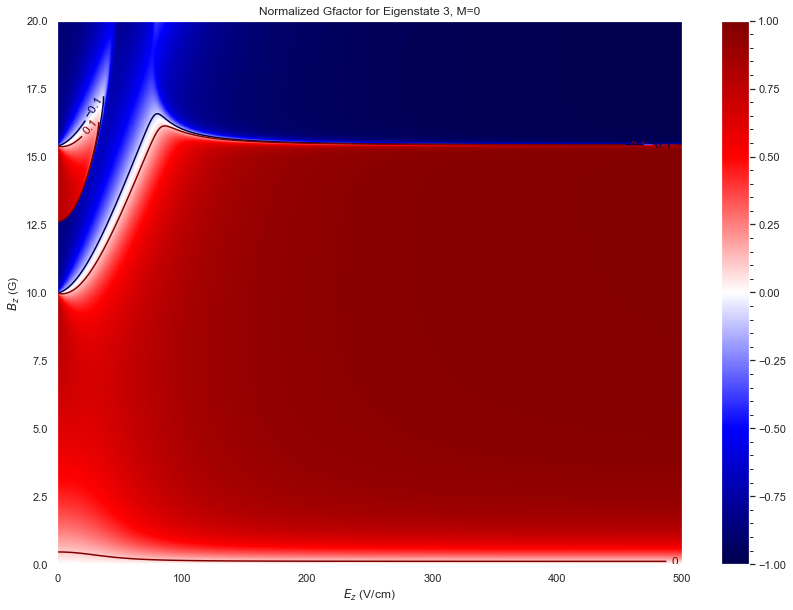

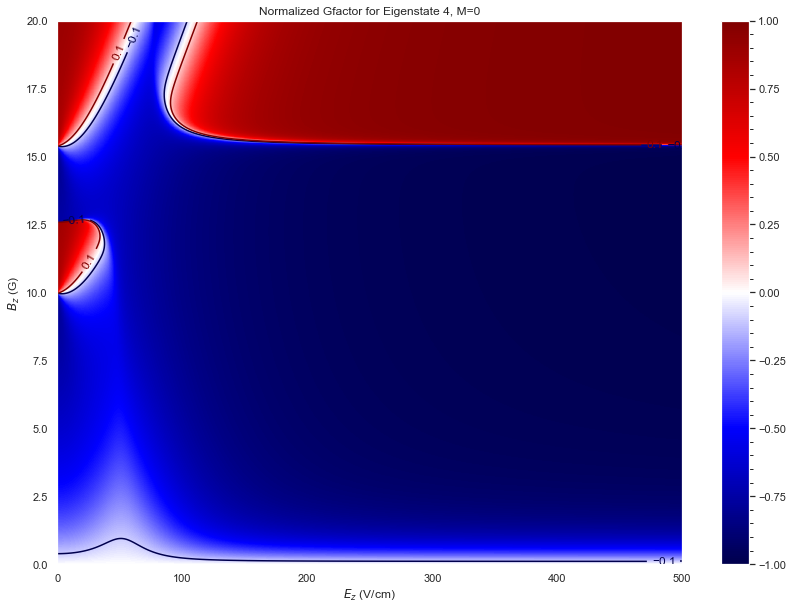

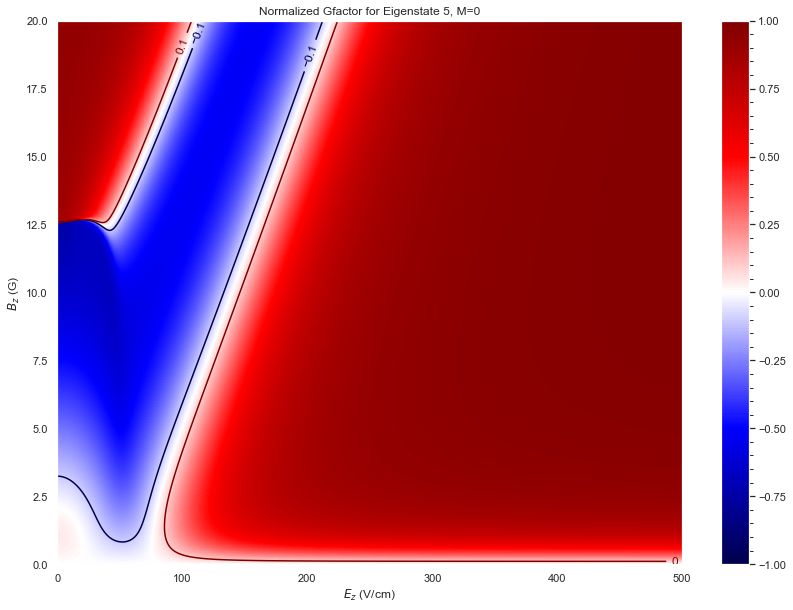

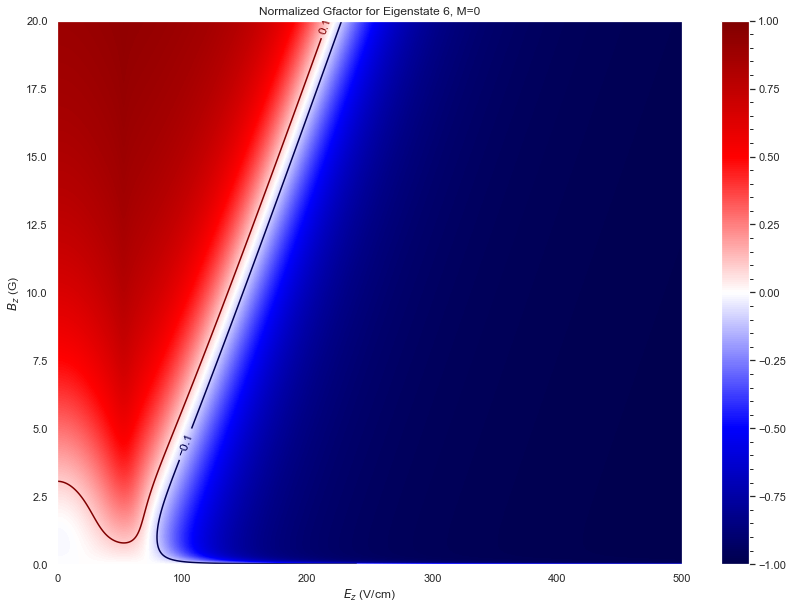

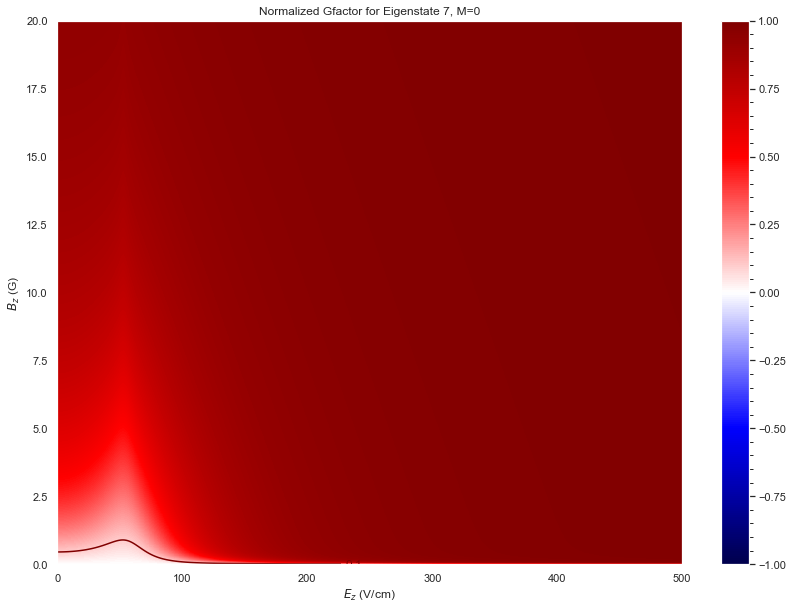

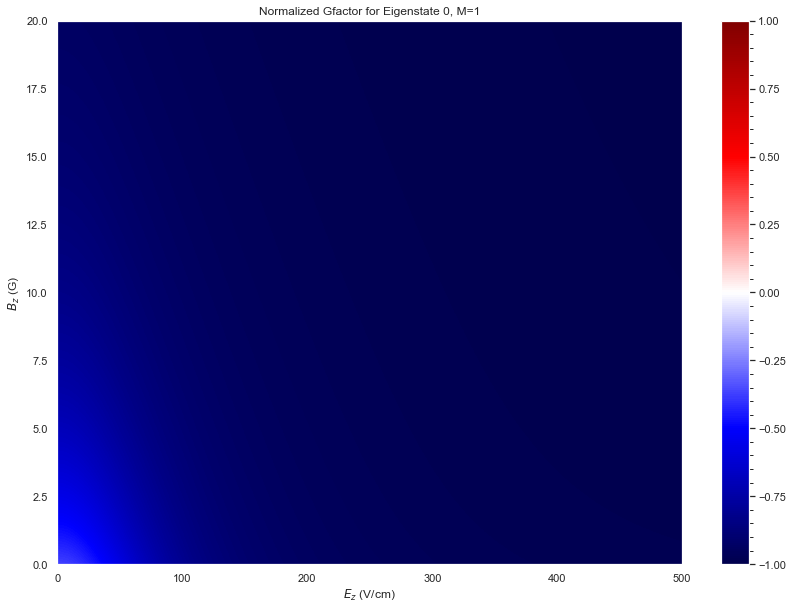

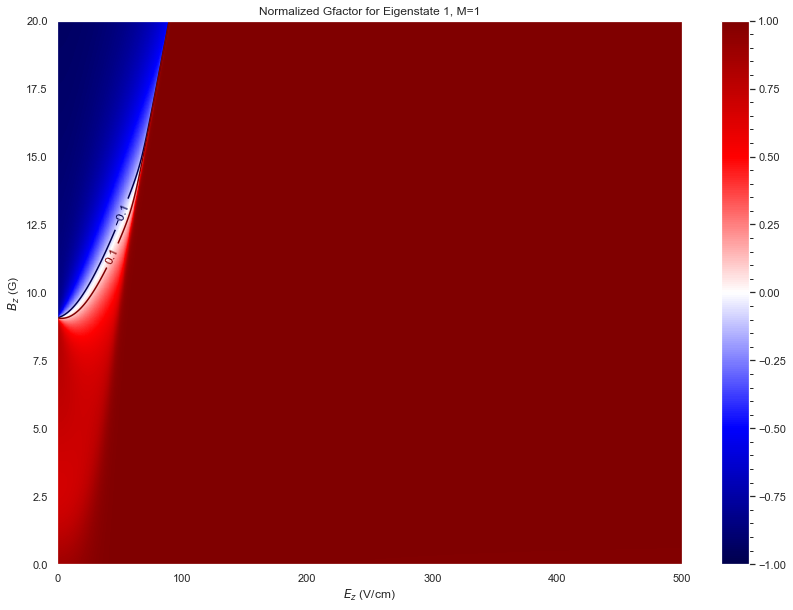

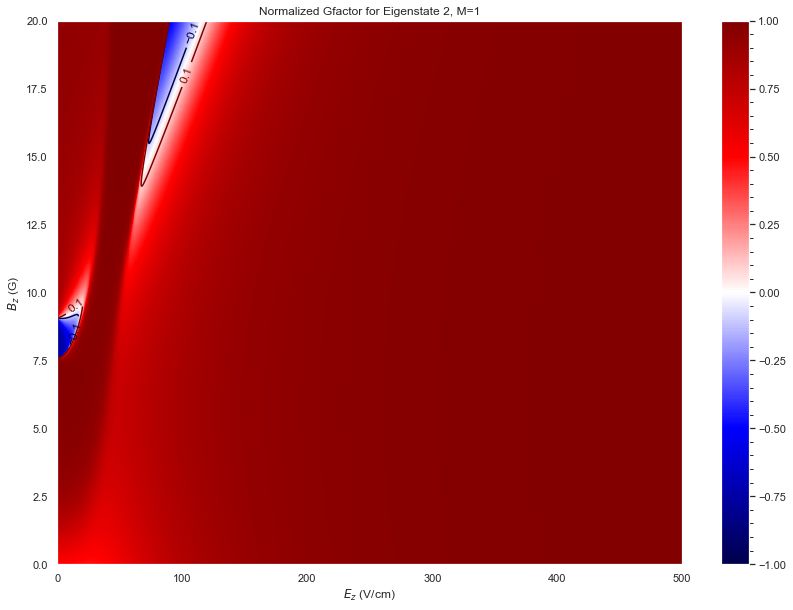

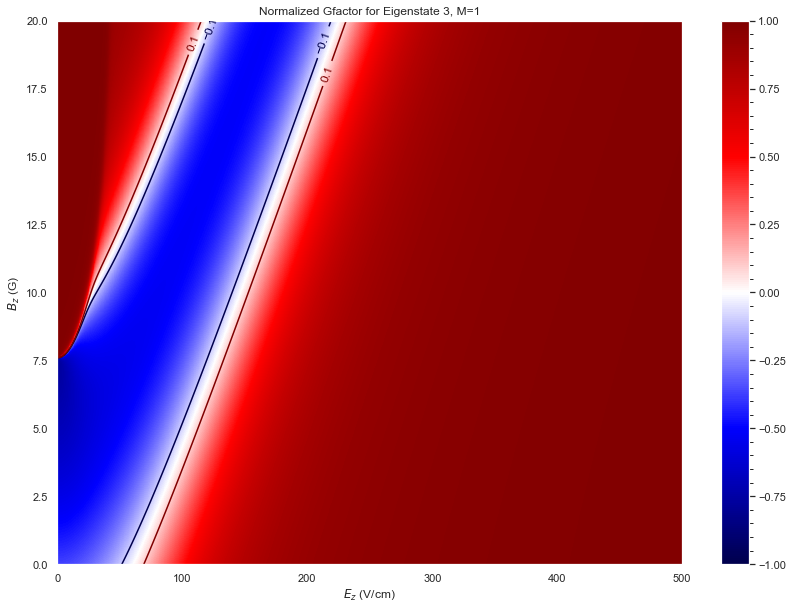

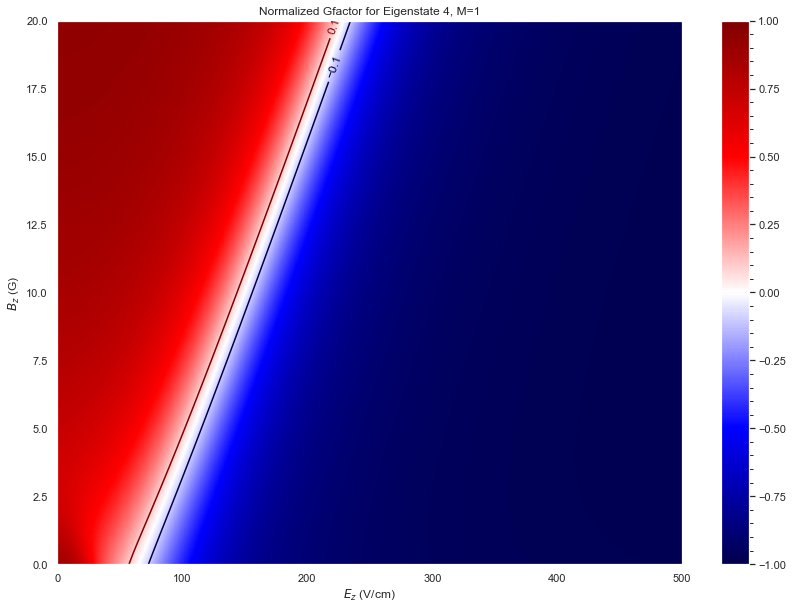

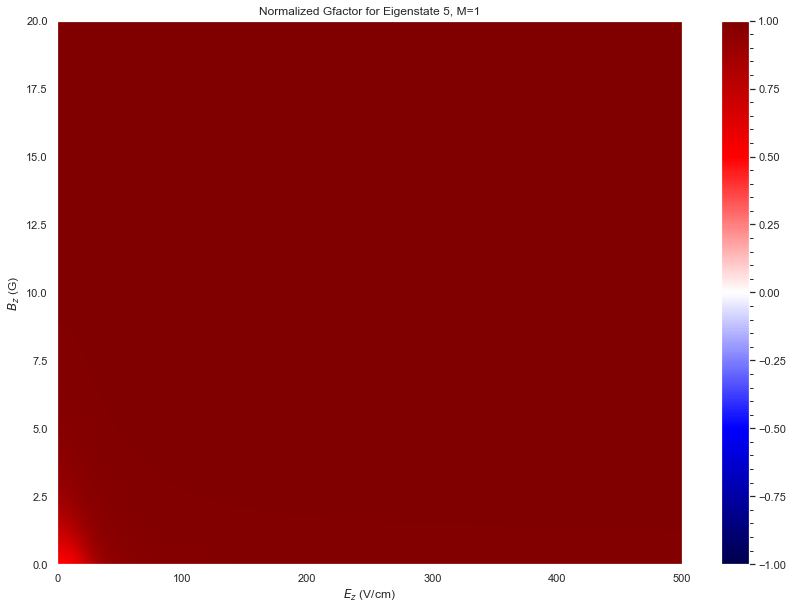

In [220]:
muBgS=1.399624494*2.0023/2
with_contour = True
for M in eval_dict.keys():
    if abs(M)==2:
        continue
    print(M)
    evals_EB = eval_dict[M]
    for i in range(len(evals_EB)):
        plt.figure(figsize=(14,10))
        geff = np.gradient(evals_EB[i])[1]/(Bz[1]-Bz[0])
        plt.grid(False)
        plt.pcolormesh(*mesh,geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
        cbar = plt.colorbar()
        cbar.minorticks_on()
        if with_contour:
            try:
                conmap = plt.contour(*mesh,geff/muBgS,cmap='seismic',levels=[-0.1,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
                plt.clabel(conmap, inline=True, fontsize=12)
    #             cbar = plt.colorbar()
    #             cbar.minorticks_on()
            except ValueError:
                print("Can't plot this data")
        plt.title('normalized Gfactor for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

-2


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1501560899.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


-1
0
1


C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1501560899.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


2


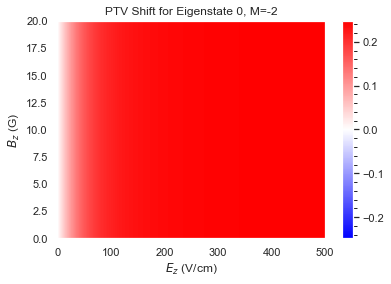

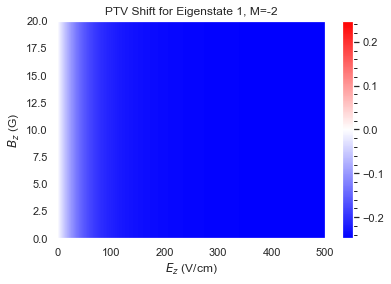

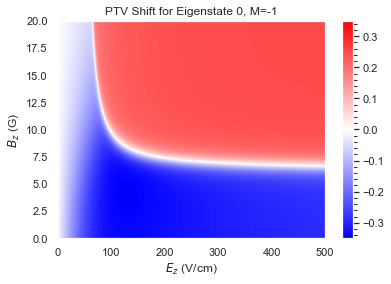

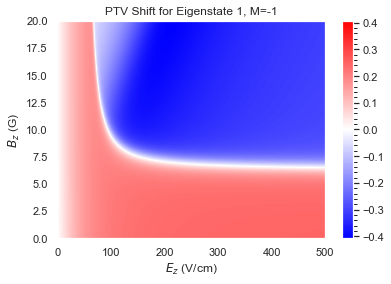

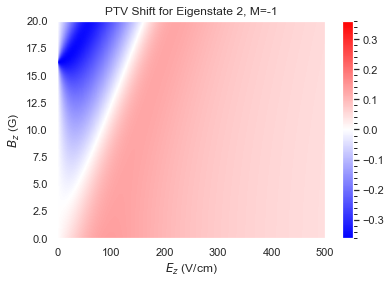

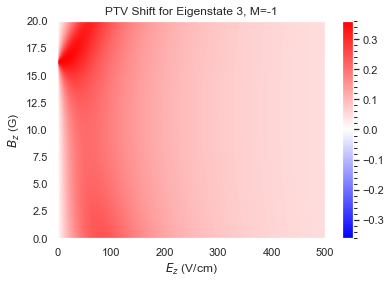

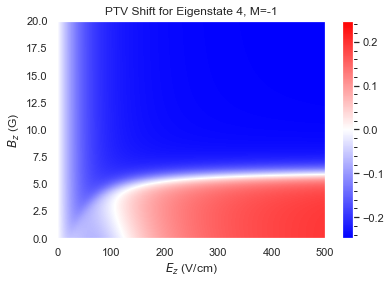

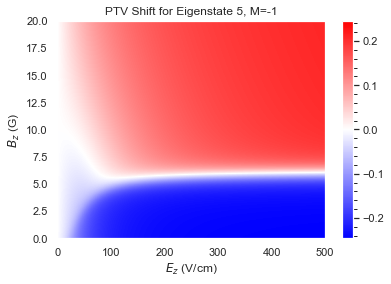

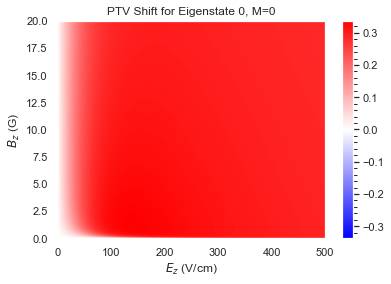

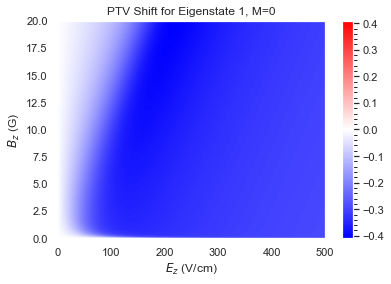

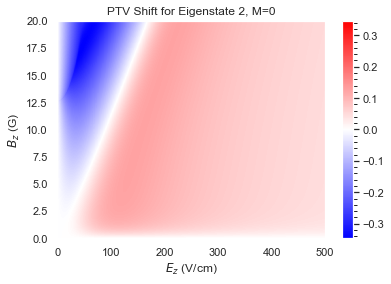

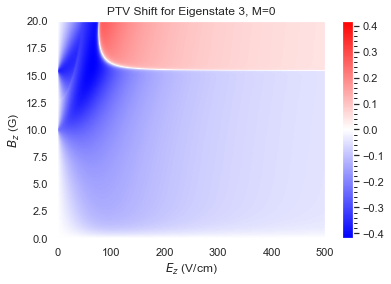

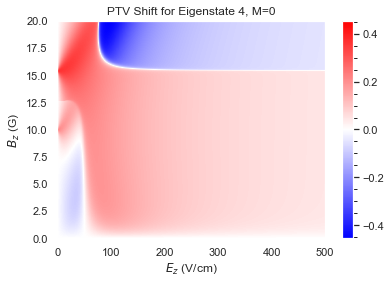

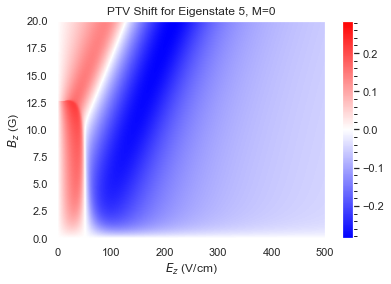

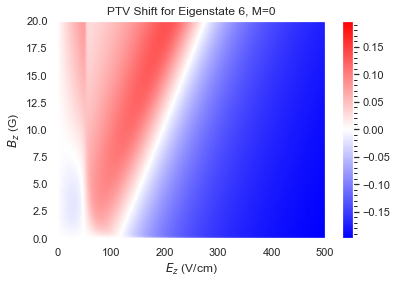

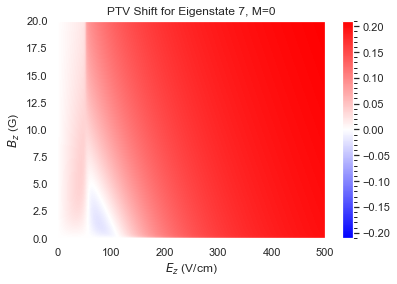

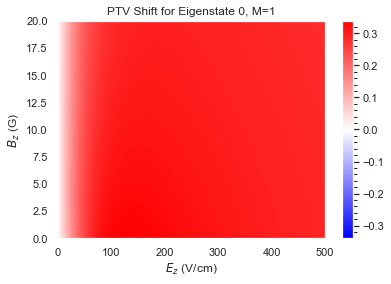

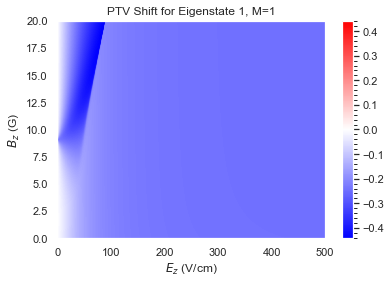

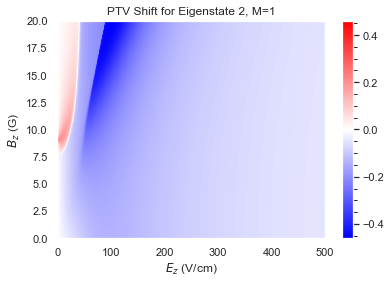

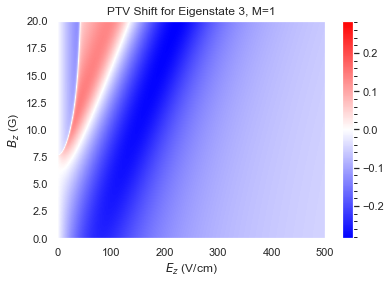

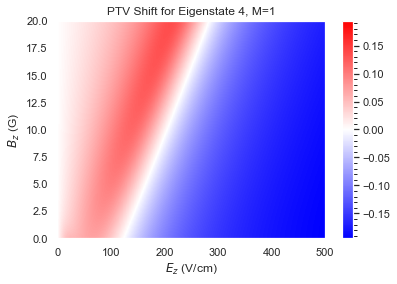

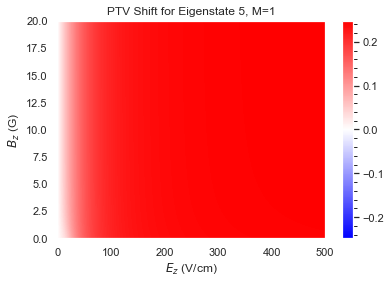

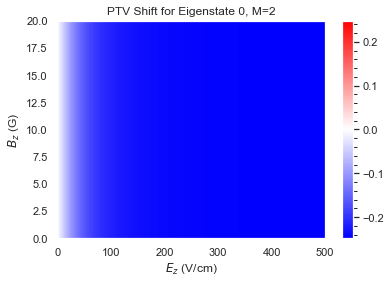

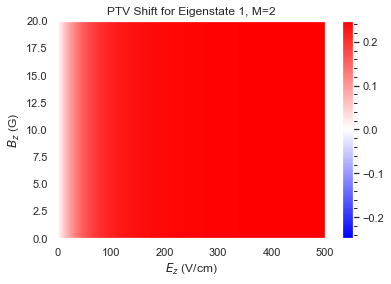

In [94]:
for M in eval_dict.keys():
    print(M)
    PTV_EB = PTV_dict[M]
    for i in range(len(PTV_EB)):
        plt.figure()
        PTV = PTV_EB[i]
        max_delta = max(abs(PTV.max()),abs(PTV.min()))
        plt.grid(False)
        plt.pcolormesh(*mesh,PTV,shading='auto',cmap='bwr',norm=TwoSlopeNorm(vmin=-max_delta,vcenter=0,vmax=max_delta))
        cbar = plt.colorbar()
        cbar.minorticks_on()
        plt.title('PTV Shift for Eigenstate {}, M={}'.format(i,M))
        plt.xlabel(r'$E_z$ (V/cm)')
        plt.ylabel(r'$B_z$ (G)')

In [96]:
eval_dict[0][3]-eval_dict[0][4]

array([[-15.94271, -15.94267, -15.94257, ..., -11.09706, -11.12208,
        -11.1471 ],
       [-15.94304, -15.943  , -15.9429 , ..., -11.09697, -11.12198,
        -11.147  ],
       [-15.94403, -15.944  , -15.9439 , ..., -11.09667, -11.12169,
        -11.14671],
       ...,
       [-40.21951, -40.21936, -40.21894, ..., -12.61294, -12.64068,
        -12.66841],
       [-40.21984, -40.2197 , -40.21928, ..., -12.61309, -12.64083,
        -12.66857],
       [-40.22018, -40.22004, -40.21962, ..., -12.61325, -12.64098,
        -12.66872]])

In [164]:
d = eval_dict[0][3]-eval_dict[0][4]
(abs(d)<0.1).any()

True

In [141]:
x = np.zeros((100,100))
y = np.zeros((100,100))+1
y[3:5,20:80] = 1

In [142]:
d = x-y
testmesh = np.array(np.meshgrid(np.arange(100),np.arange(100),indexing='ij'))

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1015796236.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

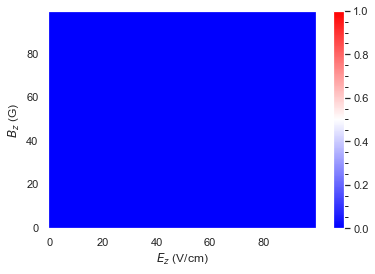

In [143]:
plt.figure()
plt.grid(False)
plt.pcolormesh(*testmesh,abs(d)<0.1,shading='auto',cmap='bwr',vmin=0,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [154]:
(abs(d)<0.1).nonzero()[0].size

0

In [158]:
len(eval_dict.keys())

5

In [170]:
E_thresh = 0.1
PTV_thresh = 0.1
geff_thresh = 0.01
Ez_idx_match = []
Bz_idx_match = []
eigenstate_match = []
M_match = []
M_list = list(eval_dict.keys())
for Midx in range(len(M_list)):
    Mi = M_list[Midx]
    for Mjdx in range(Midx,len(M_list)):
        Mj = M_list[Mjdx]
        if abs(Mi-Mj)>2:
            continue
        else:
            evals_Mi = eval_dict[Mi]
            evals_Mj = eval_dict[Mj]
            PTV_Mi = PTV_dict[Mi]
            PTV_Mj = PTV_dict[Mj]
            for i in range(len(evals_Mi)):
                for j in range(i,len(evals_Mj)):
                    if i==j and Mi==Mj:
                        continue
                    deltaE_ij = evals_Mi[i]-evals_Mj[j]
                    E_bool_match = (abs(deltaE_ij)<E_thresh)
                    if E_bool_match.any():
                        geff_i = np.gradient(evals_Mi[i])[1]/(Bz[1]-Bz[0])
                        geff_j = np.gradient(evals_Mj[j])[1]/(Bz[1]-Bz[0])
                        deltag_ij = geff_i - geff_j
                        g_bool_match = np.logical_and(abs(deltag_ij)<geff_thresh, E_bool_match)
                        if g_bool_match.any():
                            PTV_i = PTV_Mi[i]
                            PTV_j = PTV_Mj[j]
                            deltaPTV_ij = PTV_i - PTV_j
                            PTV_bool_match = np.logical_and(abs(deltaPTV_ij)>PTV_thresh, g_bool_match)
                            if PTV_bool_match.any():
                                #Found a match!
                                idx_match = PTV_bool_match.nonzero()
                                print('Found a match!')
                                print('i = {}, Mi = {}'.format(i,Mi))
                                print('j = {}, Mj = {}'.format(j,Mj))
                                print('Ez vals = {}'.format(Ez[idx_match[0]]))
                                print('Bz vals = {}'.format(Bz[idx_match[1]]))
                                print('delta geff = {}'.format(deltag_ij[idx_match]))
                                print('delta PTV = {}'.format(deltaPTV_ij[idx_match]))
                                Ez_idx_match.append(idx_match[0])
                                Bz_idx_match.append(idx_match[1])
                                eigenstate_match.append([i,j])
                                M_match.append([Mi,Mj])

Found a match!
i = 3, Mi = -1
j = 4, Mj = 0
Ez vals = [78.53927 78.53927 78.53927 78.53927 78.53927 78.53927 78.53927 78.53927
 78.78939 78.78939 78.78939 78.78939 78.78939 78.78939 78.78939 79.03952
 79.03952 79.03952 79.03952 79.03952 79.03952 79.03952 79.28964 79.28964
 79.28964 79.28964 79.28964 79.28964 79.28964 79.28964]
Bz vals = [19.52976 19.53977 19.54977 19.55978 19.56978 19.57979 19.58979 19.5998
 19.54977 19.55978 19.56978 19.57979 19.58979 19.5998  19.6098  19.56978
 19.57979 19.58979 19.5998  19.6098  19.61981 19.62981 19.58979 19.5998
 19.6098  19.61981 19.62981 19.63982 19.64982 19.65983]
delta geff = [-0.0076  -0.0052  -0.0028  -0.0004   0.00198  0.00436  0.00673  0.00909
 -0.00748 -0.00496 -0.00244  0.00008  0.00259  0.00509  0.00759 -0.00808
 -0.00546 -0.00283 -0.00022  0.0024   0.005    0.00761 -0.00927 -0.00656
 -0.00386 -0.00116  0.00154  0.00424  0.00693  0.00962]
delta PTV = [0.55281 0.55244 0.55204 0.55164 0.55121 0.55077 0.55031 0.54983 0.57322
 0.57294 0.5726

Found a match!
i = 3, Mi = -1
j = 3, Mj = 1
Ez vals = [59.77989 59.77989 59.77989 ... 61.03052 61.03052 61.03052]
Bz vals = [2.88144 2.89145 2.90145 ... 1.32066 1.33067 1.34067]
delta geff = [ 0.00984  0.00968  0.00952 ... -0.00986 -0.00991 -0.00997]
delta PTV = [0.42861 0.42846 0.42831 ... 0.45021 0.45013 0.45006]
Found a match!
i = 4, Mi = -1
j = 4, Mj = 1
Ez vals = [65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252
 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252
 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252
 65.03252 65.03252 65.03252 65.03252 65.03252 65.03252 65.28264 65.28264
 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264
 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264
 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264
 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264 65.28264
 65.28264 65.28264 65.28264 65.28264 65.28264

Found a match!
i = 1, Mi = 1
j = 2, Mj = 1
Ez vals = [0.25013]
Bz vals = [9.06453]
delta geff = [0.009]
delta PTV = [-0.43555]


In [172]:
Ez_idx_match[-2]

array([260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260,
       260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260, 260,
       260, 260, 260, 260, 261, 261, 261, 261, 261, 261, 261, 261, 261,
       261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261,
       261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261,
       261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261,
       261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 261,
       261, 261, 261, 261, 261, 261, 261, 261, 261, 261, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
       262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 26

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3096316483.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3096316483.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

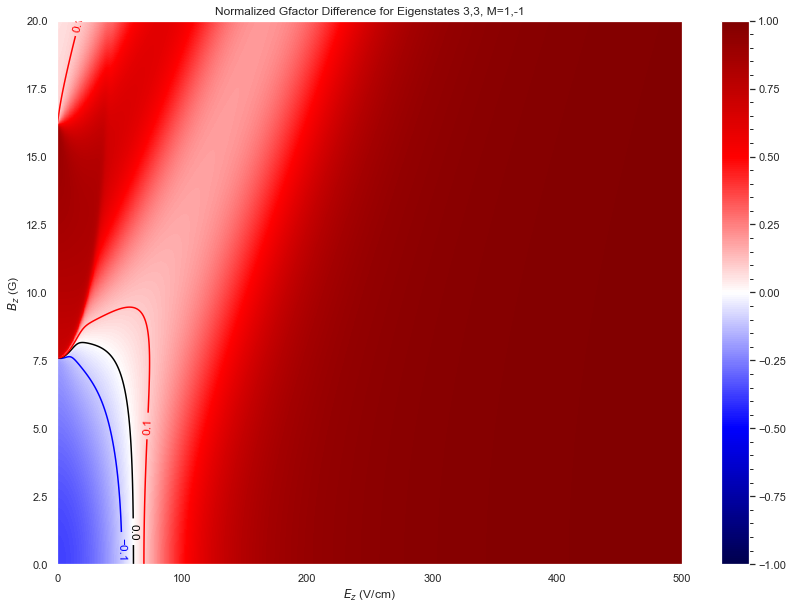

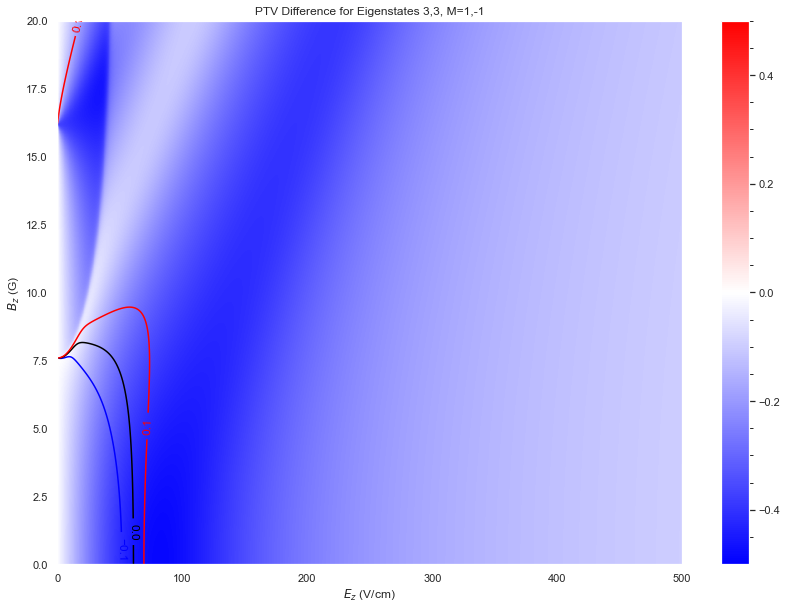

In [373]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/(2*muBgS),shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',vmin=-0.5,vmax=0.5)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()
C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/1155249723.py:32: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


Text(0, 0.5, '$B_z$ (G)')

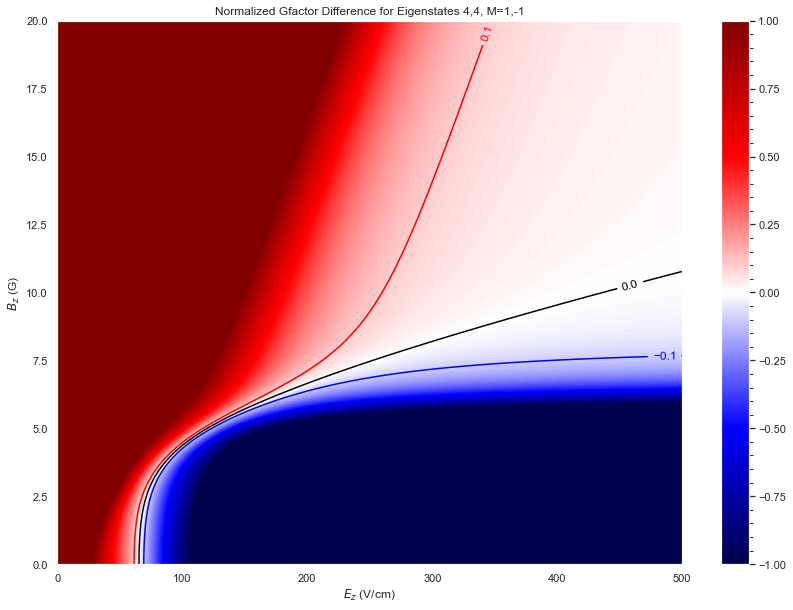

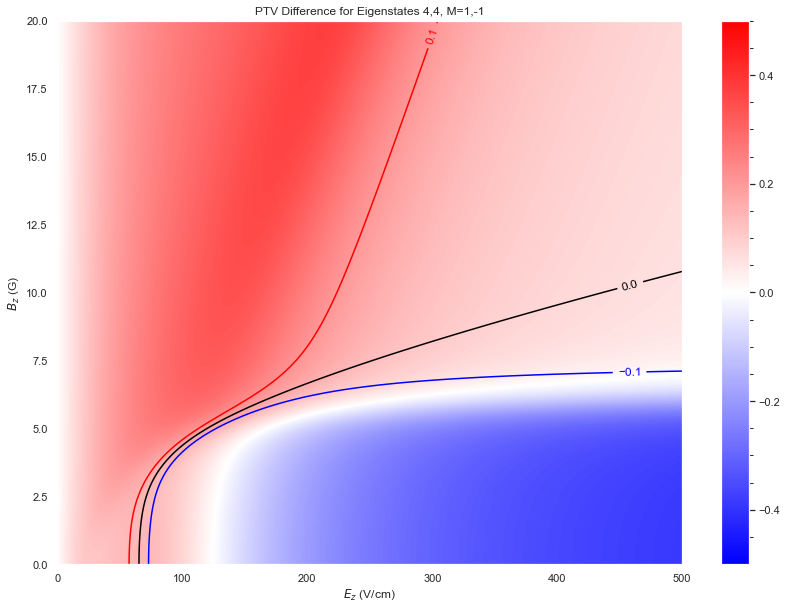

In [372]:
muBgS=1.399624494*2.0023/2
with_contour = True
idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
plt.figure(figsize=(14,10))
delta_PTV = PTV_1 - PTV_2
plt.grid(False)
plt.pcolormesh(*mesh,delta_PTV,shading='auto',cmap='bwr',vmin=-0.5,vmax=0.5)
cbar = plt.colorbar()
cbar.minorticks_on()
if with_contour:
    try:
        conmap = plt.contour(*mesh,delta_geff/(2*muBgS),colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap, inline=True, fontsize=12)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('PTV Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

In [270]:
Em = np.searchsorted(Ez,40)
Em

160

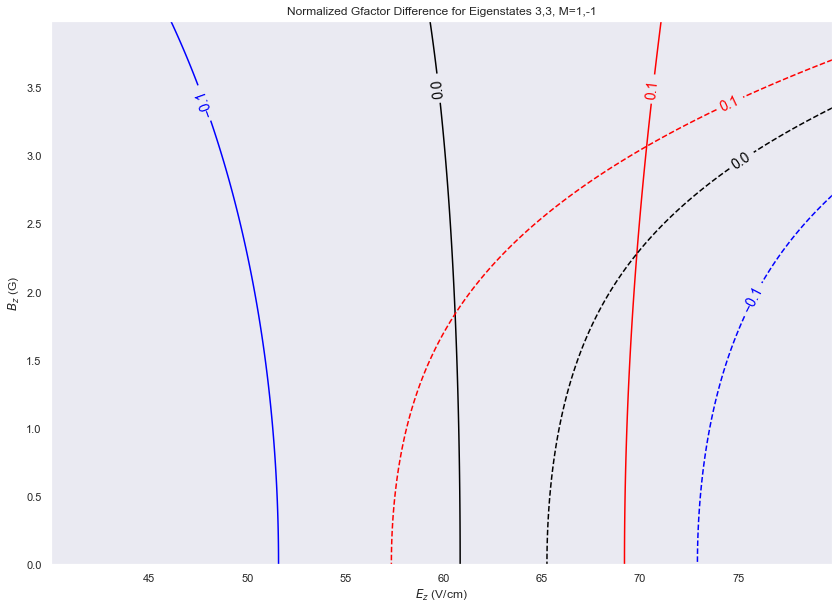

In [377]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False,manual=[(50,3.5),(60,3.5),(70,3.5)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True,manual=[(75,3.25),(75,3),(75,2)])
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

In [392]:
np.linspace(-0.1,0.1,21)

array([-0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,
        0.08,  0.09,  0.1 ])

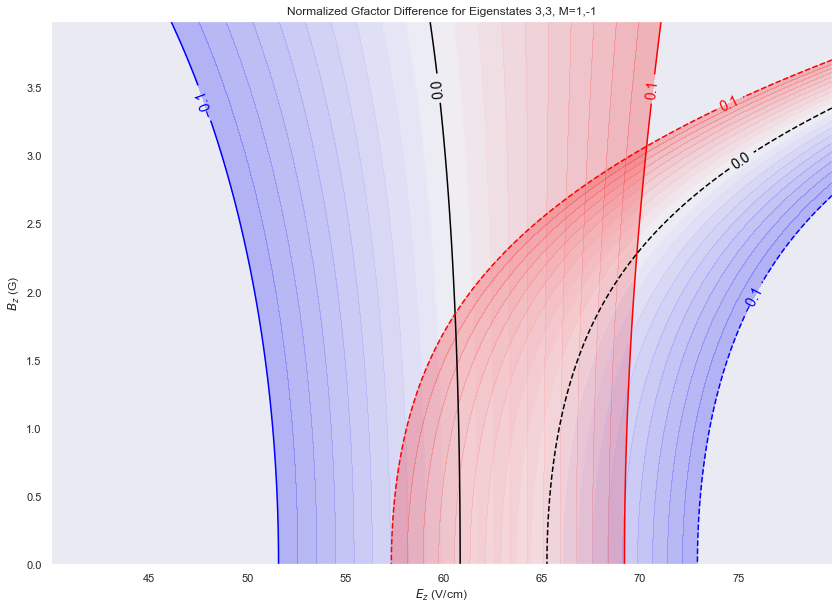

In [393]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(50,3.5),(60,3.5),(70,3.5)], fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(75,3.25),(75,3),(75,2)],fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

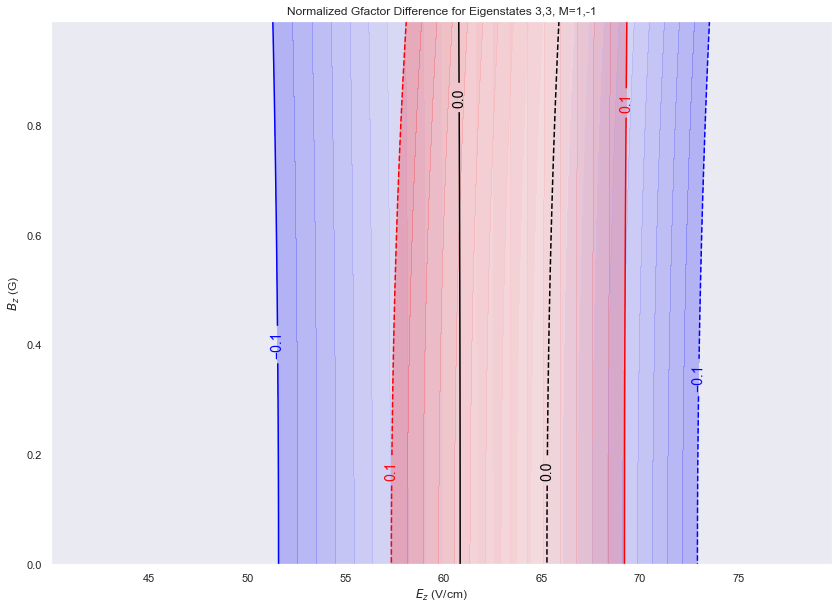

In [394]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,1)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# PTV_1 = PTV_dict[1][idx]
# PTV_2 = PTV_dict[-1][idx]
# delta_PTV = PTV_1 - PTV_2
# plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5, fontsize=14,rightside_up=False)
        smallmap1 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5,fontsize=14,rightside_up=True)
        smallmap2 = plt.contourf(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS/2,cmap='bwr',linestyles='dashed',levels=np.linspace(-0.1,0.1,21),alpha=0.25,vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")

C:\Users\ajadbaba\AppData\Local\Temp/ipykernel_17868/3213161298.py:42: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


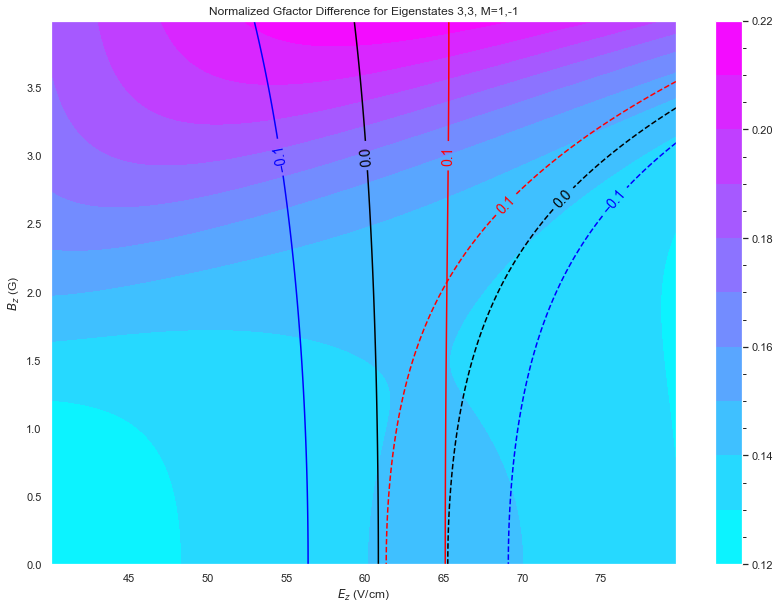

In [305]:
El = np.searchsorted(Ez,40)
Eu = np.searchsorted(Ez,80)
Bl = np.searchsorted(Bz,0)
Bu = np.searchsorted(Bz,4)
s1 = slice(El,Eu)
s2 = slice(Bl,Bu)


muBgS=1.399624494*2.0023/2
with_contour = True
idx = 3
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
plt.figure(figsize=(14,10))
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
if with_contour:
    try:
        conmap1 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap1, inline=True,inline_spacing=5,manual=[(55,3),(60,3),(65,3)], fontsize=14,rightside_up=False)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")
plt.title('normalized Gfactor Difference for Eigenstates {},{}, M=1,-1'.format(idx,idx))
plt.xlabel(r'$E_z$ (V/cm)')
plt.ylabel(r'$B_z$ (G)')

idx = 4
evals_1 = eval_dict[1][idx]
evals_2 = eval_dict[-1][idx]
geff_1 = np.gradient(evals_1)[1]/(Bz[1]-Bz[0])
geff_2 = np.gradient(evals_2)[1]/(Bz[1]-Bz[0])
delta_geff = geff_1 - geff_2
plt.grid(False)
PTV_1 = PTV_dict[1][idx]
PTV_2 = PTV_dict[-1][idx]
delta_PTV = PTV_1 - PTV_2
plt.contourf(*mesh[:,s1,s2],delta_PTV[s1,s2],levels=10,cmap='cool')
cbar = plt.colorbar()
cbar.minorticks_on()
# plt.pcolormesh(*mesh,delta_geff/muBgS,shading='auto',cmap='seismic',vmin=-1,vmax=1)
# cbar = plt.colorbar()
# cbar.minorticks_on()
if with_contour:
    try:
        conmap2 = plt.contour(*mesh[:,s1,s2],delta_geff[s1,s2]/muBgS,colors=['blue','black','red'],linestyles='dashed',levels=[-0.1,0,0.1],vmin=-0.1,vmax=0.1)#norm=TwoSlopeNorm(vmin=-1,vcenter=0,vmax=1))
        plt.clabel(conmap2,inline=True,inline_spacing=5, manual=[(68,2.75),(72,2.75),(75,2.75)],fontsize=14,rightside_up=True)
#             cbar = plt.colorbar()
#             cbar.minorticks_on()
    except ValueError:
        print("Can't plot this data")